In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime

## 1. 파일호출

In [2]:
# 파일 불러오기
with open('../../data/df_da.pkl', 'rb') as f:
    df_da = pickle.load(f)


In [3]:
# 파일 불러오기
with open('../../data/df_body.pkl', 'rb') as f:
    df_body = pickle.load(f)


In [4]:
# 파일 불러오기
with open('../../data/df_user.pkl', 'rb') as f:
    df_user = pickle.load(f)

In [5]:
# 파일 불러오기
with open('../../data/df_answer_cnt.pkl', 'rb') as f:
    df_answer_cnt = pickle.load(f)

In [6]:
# 파일 불러오기
with open('../../data/df_year_from_signup_a.pkl', 'rb') as f:
    df_year_from_signup_a = pickle.load(f)

In [7]:
# 파일 불러오기
with open('../../data/df_year_from_signup_qna.pkl', 'rb') as f:
    df_year_from_signup_qna = pickle.load(f)

In [8]:
# 파일 불러오기
with open('../../data/df_year_from_signup_q.pkl', 'rb') as f:
    df_year_from_signup_q = pickle.load(f)

In [9]:
# 파일 불러오기
with open('../../data/df_year_from_signup_a.pkl', 'rb') as f:
    df_year_from_signup_a = pickle.load(f)

In [10]:
# 파일 불러오기
with open('../../data/df_year_from_signup_a_mm.pkl', 'rb') as f:
    df_year_from_signup_a_mm = pickle.load(f)


In [11]:
# 파일 불러오기
with open('../../data/df_year_from_signup_q_mm.pkl', 'rb') as f:
    df_year_from_signup_q_mm = pickle.load(f)


In [2]:
# 파일 불러오기
with open('../../data/df_year_from_signup_qna_mm.pkl', 'rb') as f:
    df_year_from_signup_qna_mm = pickle.load(f)


In [3]:
# 파일 불러오기
with open('../../data/df_year_gpt_yn.pkl', 'rb') as f:
    df_year_gpt_yn = pickle.load(f)


In [4]:
# 파일 불러오기
with open('../../data/df_usr_post_cre_avg_med.pkl', 'rb') as f:
    df_usr_post_cre_avg_med = pickle.load(f)

In [5]:
# 파일 불러오기
with open('../../data/df_diff_usrcre_avg_med.pkl', 'rb') as f:
    df_diff_usrcre_avg_med = pickle.load(f)


In [9]:
# 파일 불러오기
with open('../../data/df_no_post_per_year.pkl', 'rb') as f:
    df_no_post_per_year = pickle.load(f)

In [10]:
# 파일 불러오기
with open('../../data/df_year_from_signup_cnt.pkl', 'rb') as f:
    df_year_from_signup_cnt = pickle.load(f)


In [47]:
# 파일 불러오기
with open('../../data/df_active_usr_per_year.pkl', 'rb') as f:
    df_active_usr_per_year = pickle.load(f)


In [2]:
# 파일 불러오기
with open('../../data/df_active_usr_per_day.pkl', 'rb') as f:
    df_active_usr_per_day = pickle.load(f)



In [16]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

In [ ]:
df_body['date'] = df_body['creationdate'].dt.date
df_body['year'] = df_body['creationdate'].dt.year
df_body['month'] = df_body['creationdate'].dt.month
df_body['day'] = df_body['creationdate'].dt.day

In [ ]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

## 2. POST

### Number of Questions and Answers over time

In [ ]:
# Q&A 만 추출 
df_body = df_body[df_body['posttypeid'].isin(['1','2'])]

In [ ]:
df_qna_num = df_body.groupby(['date', 'posttypeid']).count()[['id']].reset_index()

In [ ]:
df_qna_num[df_qna_num['posttypeid'] =='1'].date

In [ ]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
# yticks = np.arange(200, 2000, 400)
axs[0].bar(df_qna_num[df_qna_num['posttypeid'] =='1'].date
        ,  df_qna_num[df_qna_num['posttypeid'] =='1'].id
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Number of Questions over time', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('# of Q', fontsize = 15)
axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
axs[0].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_qna_num[df_qna_num['posttypeid'] =='2'].date
        ,  df_qna_num[df_qna_num['posttypeid'] =='2'].id
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Number of Answers over time', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('# of A', fontsize = 15)
axs[1].set_xticks(major_xticks)
# axs[1].set_yticks(yticks)
axs[1].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [ ]:
df_body.groupby(['posttypeid']).count()[['id']]

In [ ]:
df_body['body_len'] = df_body['body'].apply(lambda x : len(x))

In [ ]:
df_body.groupby(['year', 'month', 'day', 'posttypeid']).mean(['body_len'])

In [ ]:
df_bodycnt = df_body.groupby(['date', 'posttypeid']).count()[['id']].reset_index()

In [ ]:
df_bodycnt = pd.pivot_table(df_bodycnt, index = 'date', columns = 'posttypeid', values = 'id').reset_index()

In [ ]:
df_bodycnt['q_over_a'] = df_bodycnt['2'].div(df_bodycnt['1'])

### Question over Answer

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_bodycnt.date
    ,  height = df_bodycnt['q_over_a']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question over Answer", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A/Q", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();



In [ ]:
df_bodyanswerdyn = df_body[df_body['posttypeid'] =='1'].groupby(['date', 'answered_yn']).count()[['id']].reset_index()

In [ ]:
df_bodyanswerdyn = pd.pivot_table(df_bodyanswerdyn, index = 'date', columns = 'answered_yn', values = 'id').reset_index()

In [ ]:
df_bodyanswerdyn['rate'] = df_bodyanswerdyn[1] / (df_bodyanswerdyn[1] + df_bodyanswerdyn[0])

### Ratio of Answered Question

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_bodyanswerdyn.date
    ,  height = df_bodyanswerdyn['rate']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Ratio of Answered Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Ratio", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

### Answer Count line plot

In [ ]:
df_answer_cnt

In [ ]:
df_answer_cnt.loc[(df_answer_cnt['year']== '2020'), 'cnt'].value_counts().sort_index().to_frame()['count']

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2019'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'red',
        label = '2019.11'
) 

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2020'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'orange',
        label = '2020.11'
) 

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2021'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'green',
        label = '2021.11'
# label = ['question', 'answer']
) # create legened labels

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2022'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'blue',
         label = '2022.11'
        # label = ['question', 'answer']
        ) # create legened labels

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2023'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'purple', # bar color
        label = '2023.11'
        ) # create legened labels





ax.set_title('Answer Count line plot', fontsize = 15) # title
ax.set_xlabel('count', fontsize = 12.5) # x-axis label
ax.set_ylabel('value', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Minimun timedelta to get response per Date
* 질문과 첫번째 답 사이 gap 에 대한 time distribution

In [ ]:
df_da['qna_diff'] = df_da['a_creationdate'] - df_da['q_creationdate']

In [ ]:
df_da_df = df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1)

In [ ]:
df_da_df['qna_diff_int'] = df_da_df['qna_diff']/ pd.Timedelta(minutes=1)

In [ ]:
df_da_df[['qna_diff', 'qna_diff_int', 'date']]

In [ ]:
df_da_df_dff        = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).mean().reset_index()
df_da_df_dff_min    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).min().reset_index()
df_da_df_dff_max    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).max().reset_index()
df_da_df_dff_median = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).median().reset_index()


In [ ]:
df_da_df_dff.head()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_df_dff.date
    ,  height = df_da_df_dff['qna_diff_int']
    ,  color = 'skyblue'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_df_dff_median.date
    ,  height = df_da_df_dff_median['qna_diff_int']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

### Minimun timedelta to get response per Day in 1 month 
* 질문과 첫번째 답 사이 gap 에 대한 time distribution

In [ ]:
df_da_in_month = df_da[df_da['qna_diff'].dt.days <=30]

In [ ]:
df_da_in_month_df = df_da_in_month.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1)

In [ ]:
df_da_in_month_df['qna_diff_int'] = df_da_in_month_df['qna_diff']/ pd.Timedelta(minutes=1)

In [ ]:
df_da_in_month_df        = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).mean().reset_index()
df_da_in_month_df_min    = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).min().reset_index()
df_da_in_month_df_max    = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).max().reset_index()
df_da_in_month_df_median = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).median().reset_index()


In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_in_month_df.date
    ,  height = df_da_in_month_df['qna_diff_int']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Day in 1 Month", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_in_month_df_median.date
    ,  height = df_da_in_month_df_median['qna_diff_int']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Day in 1 Month", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

### Distribution of Timedelta

In [ ]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.hist(df_da_df_dff['qna_diff_int'], # specify data
        bins = 20, # number of bins

        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['Answer Count', 'User Count']) # create legened labels

# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Distribution of Timedelta", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Timedelta", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# ax.set_xticks(major_xticks)

# ax.axvline(['2022-11-30'], # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)



# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.show();

### Length of Questions per Date

In [ ]:
df_body.groupby(['year', 'month', 'day', 'posttypeid']).mean(['body_len'])

In [ ]:
df_date_per_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()
df_date_per_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['body_len']).reset_index()
df_date_per_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len']).reset_index()
df_date_per_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['body_len']).reset_index()

In [ ]:
df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len'])

In [ ]:
df_date_per_len_q = df_date_per_len[df_date_per_len['posttypeid'] =='1']
df_date_per_len_q = df_date_per_len_q.set_index('date')
df_date_per_len_a = df_date_per_len[df_date_per_len['posttypeid'] =='2']
df_date_per_len_a = df_date_per_len_a.set_index('date')

In [ ]:
df_date_per_len_min_q = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='1']
df_date_per_len_min_q = df_date_per_len_min_q.set_index('date')
df_date_per_len_min_a = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='2']
df_date_per_len_min_a = df_date_per_len_min_a.set_index('date')

In [ ]:
df_date_per_len_max_q = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='1']
df_date_per_len_max_q = df_date_per_len_max_q.set_index('date')
df_date_per_len_max_a = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='2']
df_date_per_len_max_a = df_date_per_len_max_a.set_index('date')

In [ ]:
df_date_per_len_median_q = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='1']
df_date_per_len_median_q = df_date_per_len_median_q.set_index('date')
df_date_per_len_median_a = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='2']
df_date_per_len_median_a = df_date_per_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.bar(df_date_per_len_q.index
    ,  height = df_date_per_len_q['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_q.index
    ,  height = df_date_per_len_median_q['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type


# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
df_date_per_len_diff = (df_date_per_len_max_q['body_len'] - df_date_per_len_min_q['body_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_date_per_len_diff.index
    ,  height = df_date_per_len_diff['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

### Length of Answers per Date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_a.index
    ,  height = df_date_per_len_a['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_a.index
    ,  height = df_date_per_len_median_a['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

### Answer Length over Question Length per Date

In [ ]:
df_date_per_len_rate = df_date_per_len_a['body_len'].div( df_date_per_len_q['body_len']).to_frame()

In [ ]:
df_date_per_len_rate.head()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_rate.index
    ,  height = df_date_per_len_rate['body_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Answer Length over Question Length per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A Len/Q Len", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();







### Length of SRC in Questions per Date

In [ ]:
def cleanhtml(raw_html):
  # 1.Source code in python language is hard to understand, so replace all the <code> tag first
  cleantext_1 = re.findall(r'(?<=\<code>)(.*?)(?=<\/code>)', raw_html.replace('\n', '_**_'))
  cleantext_1 = [x.replace('_**_', '\n') for x in cleantext_1]
  # 2. replace html tags
  # <p>
  tag_re = re.compile('<.*?>')
  cleantext_2 = [re.sub(tag_re, '', x) for x in cleantext_1]
  return cleantext_2

In [ ]:
# # apply the function, cleanhtml to the question and body text
# df_body.loc[:, 'prep_body'] = df_body['body'].apply(cleanhtml)
# 15분 걸림
# 전체 데이터셋 
# with open('../../data/df_body_prep.pkl', 'wb') as f:
#     pickle.dump(df_body, f)
# 파일 불러오기
with open('../../data/df_body_prep.pkl', 'rb') as f:
    df_body = pickle.load(f)

In [ ]:
df_body['concat_prep_body'] = df_body['prep_body'].apply(lambda x : ''.join(x))

In [ ]:
df_body['src_len'] = df_body['concat_prep_body'].apply(lambda x:len(x))

In [ ]:
len(df_body['id'].unique())
# 43352042

In [ ]:
df_date_per_src_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['src_len']).reset_index()
df_date_per_src_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['src_len']).reset_index()
df_date_per_src_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['src_len']).reset_index()
df_date_per_src_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['src_len']).reset_index()

In [ ]:
df_date_per_src_len_q = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='1']
df_date_per_src_len_q = df_date_per_src_len_q.set_index('date')
df_date_per_src_len_a = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='2']
df_date_per_src_len_a = df_date_per_src_len_a.set_index('date')

In [ ]:
df_date_per_src_len_median_q = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='1']
df_date_per_src_len_median_q = df_date_per_src_len_median_q.set_index('date')
df_date_per_src_len_median_a = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='2']
df_date_per_src_len_median_a = df_date_per_src_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_q.index
    ,  height = df_date_per_src_len_q['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_src_len_median_q.index
    ,  height = df_date_per_src_len_median_q['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of SRC in Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))


plt.xticks(rotation=45)
plt.show();

### Length  of SRC in Answers per Date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_a.index
    ,  height = df_date_per_src_len_a['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_src_len_median_a.index
    ,  height = df_date_per_src_len_median_a['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length  of SRC in Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_date_per_src_len_rate = df_date_per_src_len_a['src_len'].div( df_date_per_src_len_q['src_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_rate.index
    ,  height = df_date_per_src_len_rate['src_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [ ]:
df_q_a = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==1)]
df_q = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==0)]
# df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()

In [ ]:
# df_date_per_src_len = 
df_q_a_m = df_q_a.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()
df_q_a_m_median = df_q_a.groupby(['date','year', 'month', 'day']).median(['src_per_body']).reset_index()

df_q_m = df_q.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()
df_q_m_median = df_q.groupby(['date','year', 'month', 'day']).median(['src_per_body']).reset_index()

In [ ]:
df_q_m

In [ ]:
# df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])

### SRC length of Answered Questions

In [ ]:
### create a figure with multiple subplots


sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
yticks = np.arange(200, 2000, 400)
axs[0].bar(df_q_a_m['date']
        ,  df_q_a_m['src_len']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type


axs[0].bar(df_q_a_m_median['date']
        ,  df_q_a_m_median['src_len']
        ,  color = 'red'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('SRC length of Answered Questions ', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Length', fontsize = 15)
axs[0].set_xticks(major_xticks)
axs[0].set_yticks(yticks)
axs[0].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_q_m['date']
        ,  df_q_m['src_len']
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type
axs[1].bar(df_q_m_median['date']
        ,  df_q_m_median['src_len']
        ,  color = 'red'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('SRC length of not Answered Questions ', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Length', fontsize = 15)
axs[1].set_xticks(major_xticks)
axs[1].set_yticks(yticks)
axs[1].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();

In [ ]:
# fig, ax = plt.subplots()

# ax.bar(df_date_per_src_len_rate.index
#     ,  height = df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])
#     ,  color = 'skyblue'
#     # ,  edgecolor = 'black'
#       ) # hist type

# ax.set_title("Question and Answer Count per Date", # add title
#              fontsize = 12.5,
#              weight = 'bold',
#              pad = 10,
#              loc = 'center')
# ax.set_xlabel("Date", # add x-axis label
#               fontsize = 12.5)
# ax.set_ylabel("Count", # add y-axis label
#               fontsize = 12.5)

# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# ax.set_xticks(major_xticks)

# # ax.axvline('2022-11-30', # add vertical line
# #            color = 'red',
# #            linestyle = '--',
# #            linewidth = 1.5)


# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

# plt.xticks(rotation=45)
# plt.show();

### Length of Title per Day

In [ ]:
df_body_q = df_body[df_body['posttypeid'] =='1']

In [ ]:
df_body_q['title_len'] = df_body_q['title'].apply(lambda x : len(x))

In [ ]:
df_date_per_t_len         = df_body_q.groupby(['date','year', 'month', 'day']).mean(['title_len']).reset_index()
df_date_per_len_t_min     = df_body_q.groupby(['date','year', 'month', 'day']).min(['title_len']).reset_index()
df_date_per_len_t_max     = df_body_q.groupby(['date','year', 'month', 'day']).max(['title_len']).reset_index()
df_date_per_len_t_median  = df_body_q.groupby(['date','year', 'month', 'day']).median(['title_len']).reset_index()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_t_len.date
    ,  height = df_date_per_t_len['title_len']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_len_t_median.date
    ,  height = df_date_per_len_t_median['title_len']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type


ax.set_title("Length of Title per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

## 3. Tag

### Number of Tag per Day

In [ ]:
df_da_q = df_da[['q_id', 'q_creationdate','q_tags']].drop_duplicates()

In [ ]:
df_da_q['year'] = df_da_q['q_creationdate'].dt.year
df_da_q['month'] = df_da_q['q_creationdate'].dt.month
df_da_q['day'] = df_da_q['q_creationdate'].dt.day
df_da_q['date'] = df_da_q['q_creationdate'].dt.date

In [ ]:
df_da_q['q_tags_list'] = df_da_q['q_tags'].apply(lambda x : x.strip().split(' '))

In [ ]:
print(df_da_q[['q_id']].shape)
print(df_da_q[['q_id']].drop_duplicates().shape)

In [ ]:
df_da_q = df_da_q.reset_index(drop=True)

In [ ]:
df_da_q_ex = df_da_q[['q_id', 'q_tags_list']].apply(pd.Series.explode)

In [ ]:
df_da_q_ex['q_tags_list'].value_counts().head(20)

In [ ]:
df_da_q_ex

In [ ]:
df_da_q['q_tagslen'] = df_da_q['q_tags'].apply(lambda x : len(x.strip().split(' ')))

In [ ]:
df_da_q_year = pd.merge(df_da_q[['q_id', 'year']], df_da_q_ex, on = 'q_id')

In [ ]:
df_da_q_year = df_da_q_year.groupby(['year','q_tags_list']).count()['q_id'].reset_index()
#  df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1) > 확인필요 

In [ ]:
df_da_q_year = df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)

In [ ]:
df_da_q_year

In [ ]:
### create a figure with multiple subplots


sharey = False ## 또는 sharey=False
sharex = False ## 또는 sharex=False

fig, axs = plt.subplots(2, 5, figsize = (20, 10), sharey=sharey, sharex=sharex)

for x in range(0, 2):
    for y in range(0,5):
        standard_year = 2014
        loop_year = standard_year + (x*5 + y*1)
        axs[x][y].bar( df_da_q_year[df_da_q_year['year'] ==loop_year].q_tags_list
                    ,  df_da_q_year[df_da_q_year['year'] ==loop_year].q_id
                    ,  color = 'skyblue'
                ) # hist type
        axs[x][y].set_title(str(loop_year), # add title
             pad = 10,
             loc = 'center')
        axs[x][y].tick_params(axis='x', rotation=45)


 
plt.suptitle("Top 10 Tags of Questions over 10 years")      
plt.tight_layout()    
plt.show();

In [ ]:
df_da_q_per_len         = df_da_q.groupby(['date','year', 'month', 'day']).mean(['q_tagslen']).reset_index()
df_da_q_per_len_min     = df_da_q.groupby(['date','year', 'month', 'day']).min(['q_tagslen']).reset_index()
df_da_q_per_len_max     = df_da_q.groupby(['date','year', 'month', 'day']).max(['q_tagslen']).reset_index()
df_da_q_per_len_median  = df_da_q.groupby(['date','year', 'month', 'day']).median(['q_tagslen']).reset_index()


In [ ]:
df_da_q_per_len

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_q_per_len_median.date
    ,  height = df_da_q_per_len_median['q_tagslen']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_da_q_per_len.date
    ,  height = df_da_q_per_len['q_tagslen']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type



ax.set_title("Number of tag per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_da_q_per_len_median

### 4. User

In [ ]:
df_user['year'] = df_user['creationdate'].dt.year
df_user['month'] = df_user['creationdate'].dt.month
df_user['day'] = df_user['creationdate'].dt.day
df_user['date'] = df_user['creationdate'].dt.date


In [ ]:
df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

In [ ]:
df_user_per_date         = df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

In [ ]:
df_user_per_date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_user_per_date.date
    ,  height = df_user_per_date['id']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Sign up Users per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

## 4. User

In [15]:
df_user

,id,creationdate,displayname,lastaccessdate
0,23032175,2023-12-03 12:24:22.650,Hart Yildirim,2023-12-03 12:24:22.650
1,23030529,2023-12-03 05:23:25.267,Ukhan,2023-12-03 12:12:24.813
2,23030530,2023-12-03 05:23:55.793,David Laemle,2023-12-03 05:23:55.793
3,23030531,2023-12-03 05:24:22.443,Lina Mondal,2023-12-03 05:24:22.443
4,23030532,2023-12-03 05:24:22.637,amaansqi,2023-12-03 05:24:22.637
...,...,...,...,...
21608158,3552,2008-08-29 04:55:26.670,jamesmillerio,2023-01-25 05:00:10.843
21608159,3553,2008-08-29 04:56:13.110,Ben,2010-03-22 05:36:07.897
21608160,3555,2008-08-29 04:57:32.467,Dale,2008-11-27 01:58:18.870
21608161,3556,2008-08-29 04:58:15.947,Lee,2023-12-01 22:28:32.600


In [17]:
df_user['date']   = df_user['creationdate'].dt.date

In [18]:
df_da_q = df_da[['q_id', 'q_owneruserid']].drop_duplicates()
df_da_a = df_da[['a_id', 'a_owneruserid']].drop_duplicates()

In [19]:
df_da_q_cnt = df_da_q.groupby(['q_owneruserid']).count()[['q_id']]
df_da_a_cnt = df_da_a.groupby(['a_owneruserid']).count()[['a_id']]

In [20]:
df_user_qna = pd.merge(df_user, df_da_q_cnt, left_on = 'id', right_on = 'q_owneruserid', how= 'left')
df_user_qna = pd.merge(df_user_qna, df_da_a_cnt, left_on = 'id', right_on = 'a_owneruserid', how= 'left')

In [21]:
df_user_qna.fillna(0, inplace=True)

In [22]:
df_user_qna

,id,creationdate,displayname,lastaccessdate,date,q_id,a_id
0,23032175,2023-12-03 12:24:22.650,Hart Yildirim,2023-12-03 12:24:22.650,2023-12-03,0.0,0.0
1,23030529,2023-12-03 05:23:25.267,Ukhan,2023-12-03 12:12:24.813,2023-12-03,0.0,0.0
2,23030530,2023-12-03 05:23:55.793,David Laemle,2023-12-03 05:23:55.793,2023-12-03,0.0,0.0
3,23030531,2023-12-03 05:24:22.443,Lina Mondal,2023-12-03 05:24:22.443,2023-12-03,0.0,0.0
4,23030532,2023-12-03 05:24:22.637,amaansqi,2023-12-03 05:24:22.637,2023-12-03,0.0,0.0
...,...,...,...,...,...,...,...
21608158,3552,2008-08-29 04:55:26.670,jamesmillerio,2023-01-25 05:00:10.843,2008-08-29,2.0,2.0
21608159,3553,2008-08-29 04:56:13.110,Ben,2010-03-22 05:36:07.897,2008-08-29,0.0,0.0
21608160,3555,2008-08-29 04:57:32.467,Dale,2008-11-27 01:58:18.870,2008-08-29,0.0,0.0
21608161,3556,2008-08-29 04:58:15.947,Lee,2023-12-01 22:28:32.600,2008-08-29,0.0,1.0


### Question and Answer

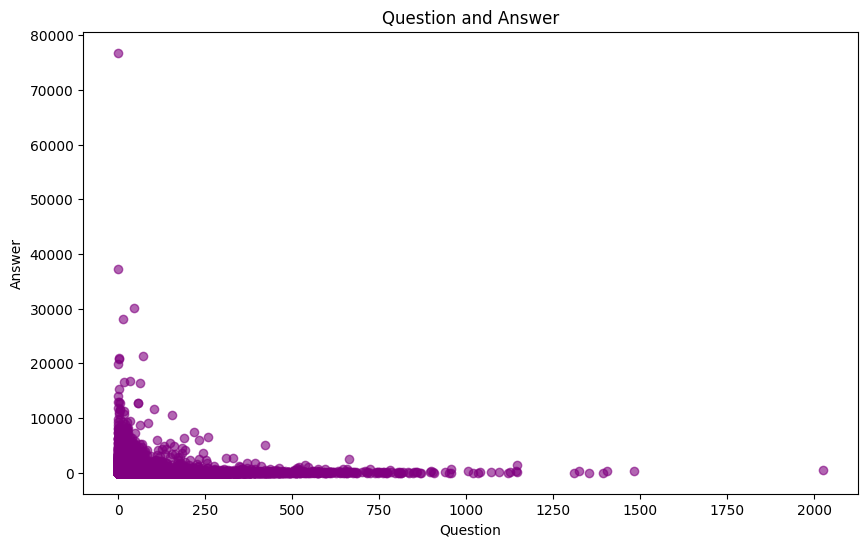

In [23]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_user_qna['q_id'], df_user_qna['a_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [24]:
df_user_qna

,id,creationdate,displayname,lastaccessdate,date,q_id,a_id
0,23032175,2023-12-03 12:24:22.650,Hart Yildirim,2023-12-03 12:24:22.650,2023-12-03,0.0,0.0
1,23030529,2023-12-03 05:23:25.267,Ukhan,2023-12-03 12:12:24.813,2023-12-03,0.0,0.0
2,23030530,2023-12-03 05:23:55.793,David Laemle,2023-12-03 05:23:55.793,2023-12-03,0.0,0.0
3,23030531,2023-12-03 05:24:22.443,Lina Mondal,2023-12-03 05:24:22.443,2023-12-03,0.0,0.0
4,23030532,2023-12-03 05:24:22.637,amaansqi,2023-12-03 05:24:22.637,2023-12-03,0.0,0.0
...,...,...,...,...,...,...,...
21608158,3552,2008-08-29 04:55:26.670,jamesmillerio,2023-01-25 05:00:10.843,2008-08-29,2.0,2.0
21608159,3553,2008-08-29 04:56:13.110,Ben,2010-03-22 05:36:07.897,2008-08-29,0.0,0.0
21608160,3555,2008-08-29 04:57:32.467,Dale,2008-11-27 01:58:18.870,2008-08-29,0.0,0.0
21608161,3556,2008-08-29 04:58:15.947,Lee,2023-12-01 22:28:32.600,2008-08-29,0.0,1.0


In [25]:
df_user_qna['gpt_af_yn'] = np.where(df_user_qna['date'] >= datetime.date(2022,11,30), 1, 0)

In [26]:
df_user_qna

,id,creationdate,displayname,lastaccessdate,date,q_id,a_id,gpt_af_yn
0,23032175,2023-12-03 12:24:22.650,Hart Yildirim,2023-12-03 12:24:22.650,2023-12-03,0.0,0.0,1
1,23030529,2023-12-03 05:23:25.267,Ukhan,2023-12-03 12:12:24.813,2023-12-03,0.0,0.0,1
2,23030530,2023-12-03 05:23:55.793,David Laemle,2023-12-03 05:23:55.793,2023-12-03,0.0,0.0,1
3,23030531,2023-12-03 05:24:22.443,Lina Mondal,2023-12-03 05:24:22.443,2023-12-03,0.0,0.0,1
4,23030532,2023-12-03 05:24:22.637,amaansqi,2023-12-03 05:24:22.637,2023-12-03,0.0,0.0,1
...,...,...,...,...,...,...,...,...
21608158,3552,2008-08-29 04:55:26.670,jamesmillerio,2023-01-25 05:00:10.843,2008-08-29,2.0,2.0,0
21608159,3553,2008-08-29 04:56:13.110,Ben,2010-03-22 05:36:07.897,2008-08-29,0.0,0.0,0
21608160,3555,2008-08-29 04:57:32.467,Dale,2008-11-27 01:58:18.870,2008-08-29,0.0,0.0,0
21608161,3556,2008-08-29 04:58:15.947,Lee,2023-12-01 22:28:32.600,2008-08-29,0.0,1.0,0


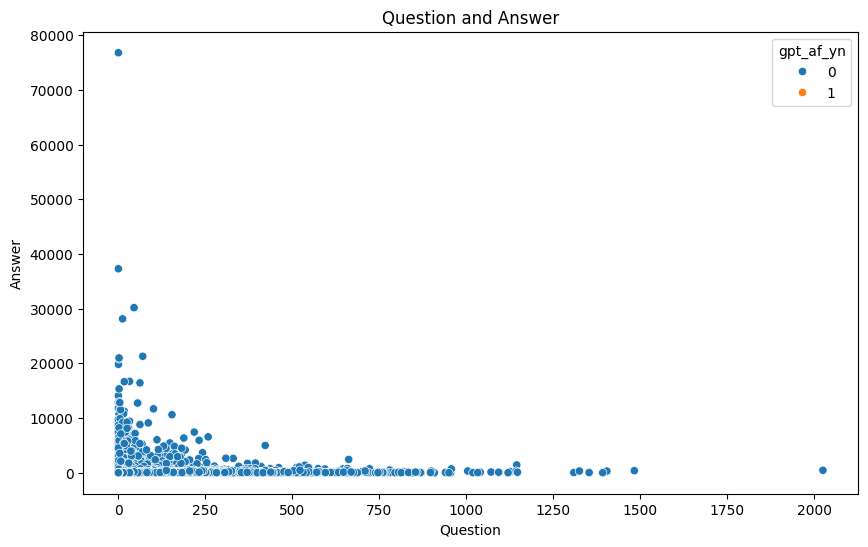

In [27]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' )

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna[df_user_qna['gpt_af_yn'] ==1] , x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' )

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [28]:
df_user_qna[df_user_qna['a_id']>70000]

,id,creationdate,displayname,lastaccessdate,date,q_id,a_id,gpt_af_yn
20946986,1144035,2012-01-11 19:53:57.590,Gordon Linoff,2023-06-16 22:48:45.203,2012-01-11,0.0,76778.0,0


아니 혼자 7만건은 좀 너무한거 아닙니까...ㅎㅎㅎㅎㅎ

In [29]:
df_q_1144035 = df_da.loc[df_da['a_owneruserid'] == 1144035, ['q_id', 'a_creationdate']]

In [30]:
df_q_1144035 = df_q_1144035[['q_id', 'a_creationdate']].drop_duplicates()

In [31]:
df_q_1144035['date'] = df_q_1144035['a_creationdate'].dt.date

In [32]:
df_q_1144035

,q_id,a_creationdate,date
651,69180966,2021-09-14 15:55:02.210,2021-09-14
759,68194599,2021-06-30 12:19:13.630,2021-06-30
764,68186990,2021-06-30 00:10:27.797,2021-06-30
861,67298550,2021-04-28 10:36:32.637,2021-04-28
957,66342173,2021-02-23 22:59:26.460,2021-02-23
...,...,...,...
23040571,37210123,2016-05-13 12:33:13.263,2016-05-13
23040630,29812032,2015-04-23 01:37:26.893,2015-04-23
23041368,30920740,2015-06-18 16:33:49.587,2015-06-18
23041448,30439758,2015-05-25 13:48:46.747,2015-05-25


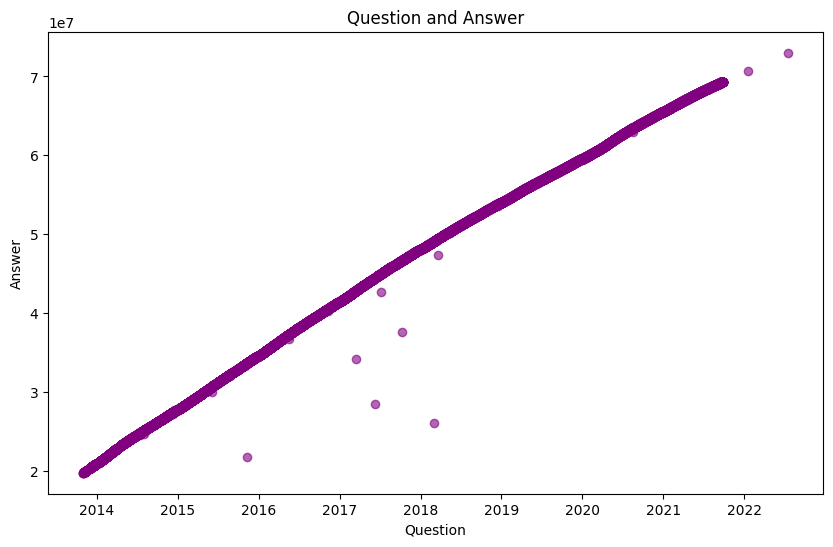

In [33]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_q_1144035['date'], df_q_1144035['q_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
df_q_1144035['date'].max()

In [ ]:
df_q_1144035.groupby('date').count()[['q_id']].sort_values(by = ['date'])

### Number of Posts after year from signup

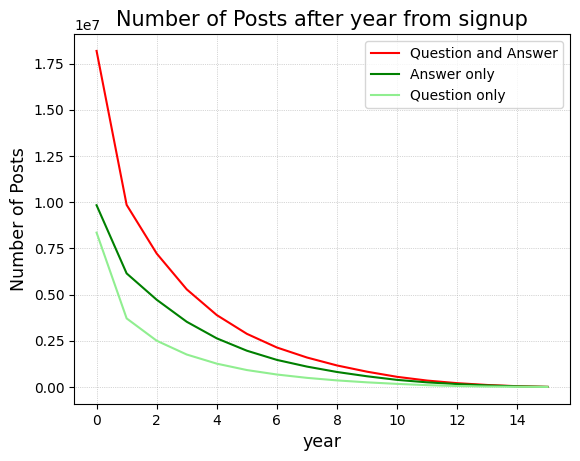

In [9]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>0, 'cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 


ax.plot(df_year_from_signup_a.loc[df_year_from_signup_a['yeardiff']>0, 'cnt'].values, # specify data
        color = 'green',
        label = 'Answer only'
) 

ax.plot(df_year_from_signup_q.loc[df_year_from_signup_q['yeardiff']>0, 'cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Question only'
) 

# 

ax.set_title('Number of Posts after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [13]:
df_year_from_signup_qna_mm['mean_cnt'].values

array([Decimal('1.1694610687170988'), Decimal('6.6143812951156638'),
       Decimal('5.4775094769932505'), Decimal('4.8009331259720062'),
       Decimal('5.4027432056589229'), Decimal('5.5068743390058648'),
       Decimal('5.9554522122198812'), Decimal('6.6549380755795491'),
       Decimal('5.2684918716344985'), Decimal('5.2058119005582860'),
       Decimal('6.8955567357054346'), Decimal('5.3259167526659787'),
       Decimal('6.2706355316055085'), Decimal('6.1035138658231052'),
       Decimal('6.7678097725903294'), Decimal('5.6700696650944327'),
       Decimal('6.1495202639305064')], dtype=object)

In [19]:
df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values
# ['mean_cnt']

array([Decimal('1.1694610687170988'), Decimal('6.1035138658231052'),
       Decimal('6.7678097725903294'), Decimal('6.6143812951156638'),
       Decimal('6.2706355316055085'), Decimal('5.9554522122198812'),
       Decimal('5.6700696650944327'), Decimal('5.4775094769932505'),
       Decimal('5.4027432056589229'), Decimal('5.3259167526659787'),
       Decimal('5.2684918716344985'), Decimal('5.2058119005582860'),
       Decimal('5.5068743390058648'), Decimal('6.1495202639305064'),
       Decimal('6.6549380755795491'), Decimal('6.8955567357054346'),
       Decimal('4.8009331259720062')], dtype=object)

### Average Number of Posts after year from signup

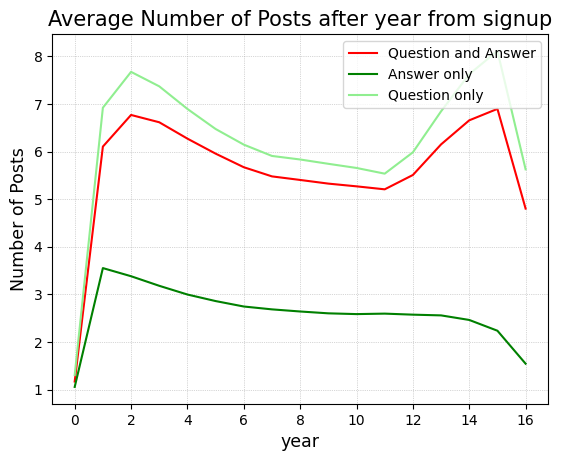

In [20]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 


ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Answer only'
) 

ax.plot(df_year_from_signup_a_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Question only'
) 

# 

ax.set_title('Average Number of Posts after year from- 질문 대답안한사람 빠진 통계', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Unique Number of Users per post, question, and answer after year from signup

In [13]:
df_year_from_signup_cnt = df_year_from_signup_cnt[df_year_from_signup_cnt['yeardiff'] >=0]

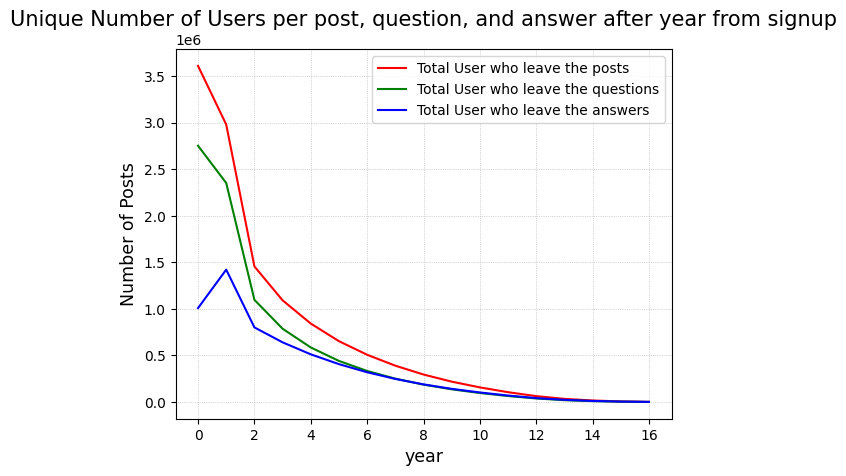

In [17]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_cnt.sort_values(by = ['yeardiff'])['tot_usr_cnt'].values, # specify data
        color = 'red',
        label = 'Total User who leave the posts'
) 


ax.plot(df_year_from_signup_cnt.sort_values(by = ['yeardiff'])['q_usr_cnt'].values, # specify data
        color = 'green',
        label = 'Total User who leave the questions'
) 

ax.plot(df_year_from_signup_cnt.sort_values(by = ['yeardiff'])['a_usr_cnt'].values, # specify data
        color = 'blue',
        label = 'Total User who leave the answers'
) 



ax.set_title('Unique Number of Users per post, question, and answer after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

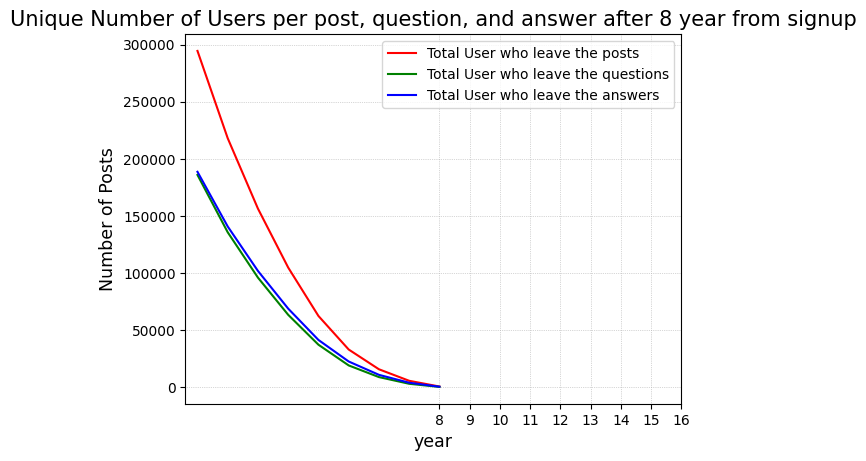

In [21]:
fig, ax = plt.subplots()


df_year_from_signup_cnt_over8 = df_year_from_signup_cnt[df_year_from_signup_cnt['yeardiff']>=8]
ax.plot(df_year_from_signup_cnt_over8.sort_values(by = ['yeardiff'])['tot_usr_cnt'].values, # specify data
        color = 'red',
        label = 'Total User who leave the posts'
) 


ax.plot(df_year_from_signup_cnt_over8.sort_values(by = ['yeardiff'])['q_usr_cnt'].values, # specify data
        color = 'green',
        label = 'Total User who leave the questions'
) 

ax.plot(df_year_from_signup_cnt_over8.sort_values(by = ['yeardiff'])['a_usr_cnt'].values, # specify data
        color = 'blue',
        label = 'Total User who leave the answers'
) 



ax.set_title('Unique Number of Users per post, question, and answer after 8 year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label
ax.set_xticks(np.arange(8, 17))

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Median Number of Posts after year from signup

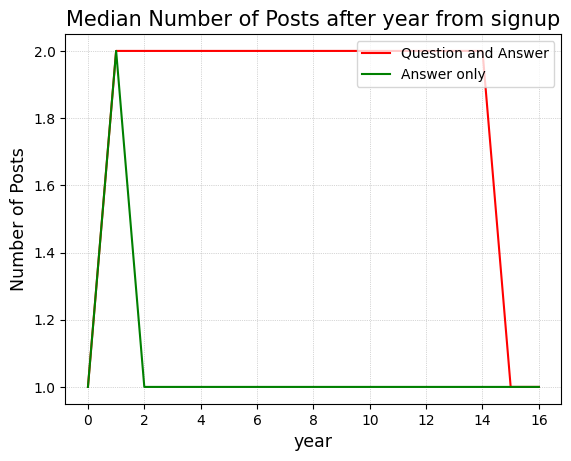

In [21]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 


ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'green',
        label = 'Answer only'
) 

# ax.plot(df_year_from_signup_a_mm['med_cnt'].values, # specify data
#         color = 'lightgreen',
#         label = 'Question only'
# ) 

# 

ax.set_title('Median Number of Posts after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Comparing Median/Average Number of Posts after year from signup

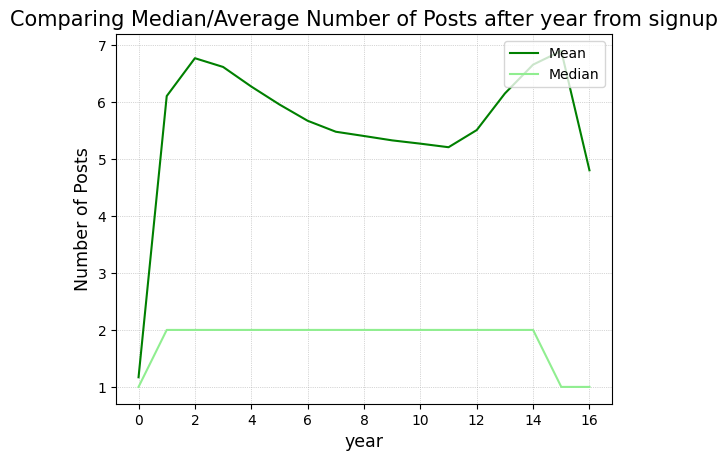

In [44]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 




ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Median'
)




ax.set_title('Comparing Median/Average Number of Posts after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Comparing Median/Average Number of Questions after year from signup

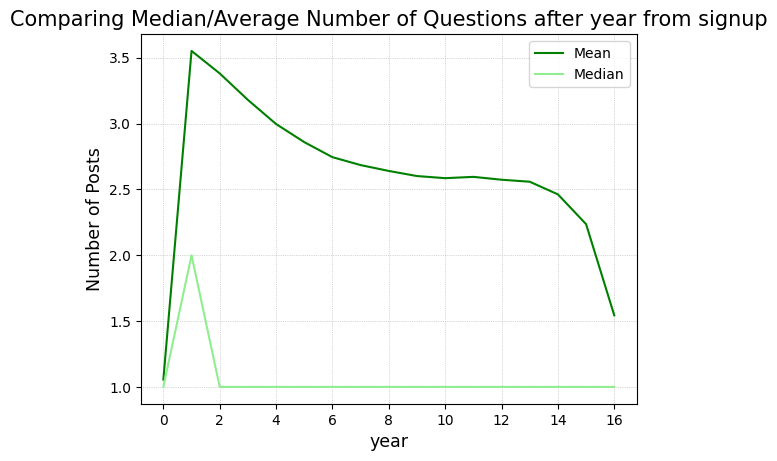

In [26]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 

ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Median'
) 



ax.set_title('Comparing Median/Average Number of Questions after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Comparing Median/Average Number of Answers after year from signup

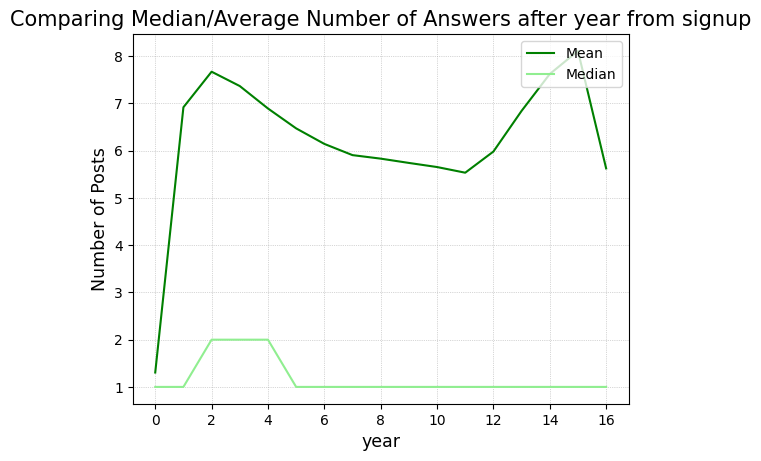

In [27]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_a_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 

ax.plot(df_year_from_signup_a_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Median'
) 



ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [33]:
df_year_gpt_yn = df_year_gpt_yn[df_year_gpt_yn['yeardiff']>=0]

In [34]:
df_year_gpt_yn

,yeardiff,c_gpt_yn,u_c_gpt_yn,q_cnt,usr_cnt
22,0.0,0,0,3997396,3400974
23,-0.0,0,1,7,3
24,0.0,1,0,67,56
25,0.0,1,1,222349,207341
26,1.0,0,0,17809152,2844994
27,1.0,1,0,168223,67406
28,1.0,1,1,203766,91140
29,2.0,0,0,9645953,1382502
30,2.0,1,0,204448,85176
31,2.0,1,1,4,2


In [35]:
c_gpt_n = df_year_gpt_yn['c_gpt_yn'] ==0
c_gpt_y = df_year_gpt_yn['c_gpt_yn'] ==1 

u_c_gpt_n = df_year_gpt_yn['u_c_gpt_yn'] ==0
u_c_gpt_y = df_year_gpt_yn['u_c_gpt_yn'] ==1 

In [38]:
df_year_gpt_yn.loc[c_gpt_n&u_c_gpt_n, 'q_cnt'].values


array([ 3997396, 17809152,  9645953,  7044505,  5131169,  3755809,
        2745774,  2007506,  1468774,  1047846,   699248,   425159,
         249959,   133219,    53518,     5142])

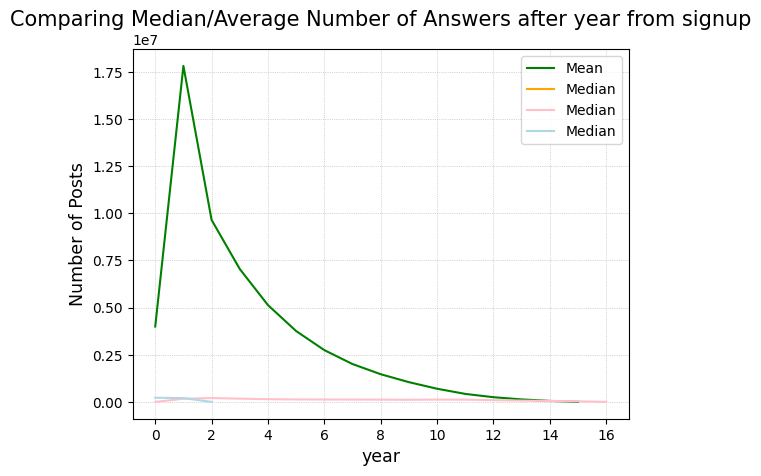

In [42]:
fig, ax = plt.subplots()


ax.plot(df_year_gpt_yn.loc[c_gpt_n&u_c_gpt_n, 'q_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 

ax.plot(df_year_gpt_yn.loc[c_gpt_n&u_c_gpt_y, 'q_cnt'].values, # specify data
        color = 'orange',
        label = 'Median'
) 

ax.plot(df_year_gpt_yn.loc[c_gpt_y&u_c_gpt_n, 'q_cnt'].values, # specify data
        color = 'pink',
        label = 'Median'
) 

ax.plot(df_year_gpt_yn.loc[c_gpt_y&u_c_gpt_y, 'q_cnt'].values, # specify data
        color = 'lightblue',
        label = 'Median'
) 



ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

,yeardiff,c_gpt_yn,u_c_gpt_yn,q_cnt,usr_cnt
23,-0.0,0,1,7,3


In [48]:
df_usr_post_cre_avg_med.sort_values(by  = ['usr_creationyear', 'post_creationyear'])

,usr_creationyear,post_creationyear,avg_post_cnt,med_post_cnt
32,2008,2013,7.4596319245352816,0E-20
97,2008,2014,5.4136687320817534,0E-20
89,2008,2015,4.1688708036622584,0E-20
115,2008,2016,3.4425691297512254,0E-20
81,2008,2017,2.9247202441505595,0E-20
...,...,...,...,...
23,2021,2022,0.13814605068349098648,0E-20
7,2021,2023,0.05982005661358230184,0E-20
38,2022,2022,0.21210766974602804320,0E-20
101,2022,2023,0.07478569191271196547,0E-20


In [47]:
df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear'] =='2010']

,usr_creationyear,post_creationyear,avg_post_cnt,med_post_cnt
0,2010,2019,0.64851599549875411944,0E-20
8,2010,2018,0.78619584438549955791,0E-20
22,2010,2021,0.48038240495137046861,0E-20
28,2010,2017,1.0103086568603810,0E-20
31,2010,2022,0.40641829434932883209,0E-20
34,2010,2016,1.3093350614902339,0E-20
48,2010,2014,2.1747196768748493,0E-20
59,2010,2020,0.60451832650108512177,0E-20
64,2010,2013,2.9901133349409211,0E-20
66,2010,2015,1.6821999839241219,0E-20


In [19]:
df_diff_usrcre_avg_med = df_diff_usrcre_avg_med.sort_values(by = ['usr_creationyear', 'yeardiff'])

In [20]:
df_diff_usrcre_avg_med.head()

,yeardiff,usr_creationyear,avg_cnt,med_cnt
128,0.0,2008,2.2150094996833439,1.00000000000000000000
86,1.0,2008,33.5873763038245520,10.0000000000000000
123,2.0,2008,30.7345577211394303,7.0000000000000000
34,3.0,2008,28.1061071873701703,6.0000000000000000
15,4.0,2008,22.7998296422487223,5.0000000000000000


### Comparing Average Number of Posts per Cohort after year from signup

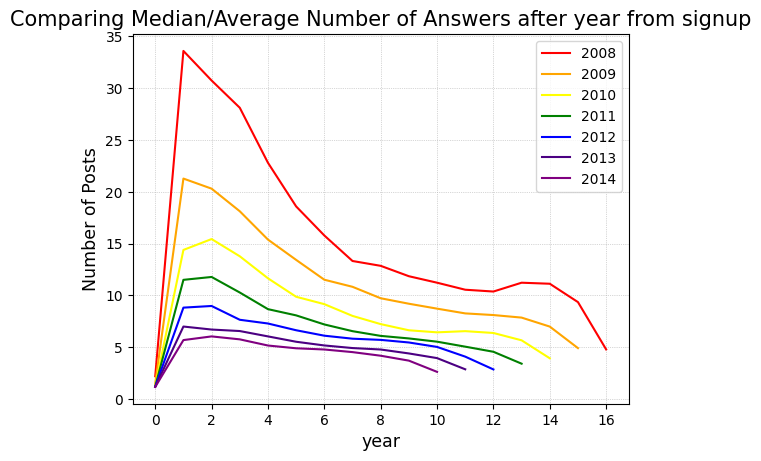

In [33]:
year_list = [str(x) for x in np.arange(2008, 2008+7)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(0, 7):    
        ax.plot(df_diff_usrcre_avg_med.loc[df_diff_usrcre_avg_med['usr_creationyear']==year_list[i], ['avg_cnt']].values, # specify data
                color = color_list[i],
                label = year_list[i]
        ) 

ax.set_title('Comparing Average Number of Posts per Cohort after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();
# 08년 집단이 왜이렇게 강력한가 
# 2008년부터 2014년까지의 코호트는 모두 비슷하게 1 2년차에 가장 활동을 활발하게 하고 갈수록 떨어진다

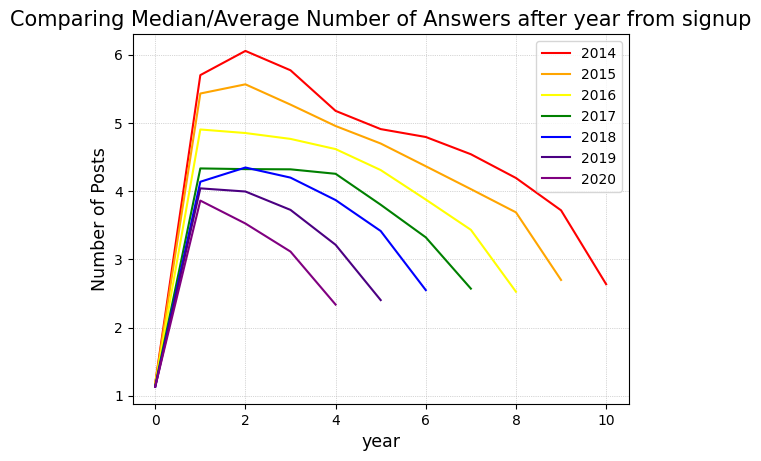

In [34]:
year_list = [str(x) for x in np.arange(2014, 2014+7)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(0, 7):    
        ax.plot(df_diff_usrcre_avg_med.loc[df_diff_usrcre_avg_med['usr_creationyear']==year_list[i], ['avg_cnt']].values, # specify data
                color = color_list[i],
                label = year_list[i]
        ) 

ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

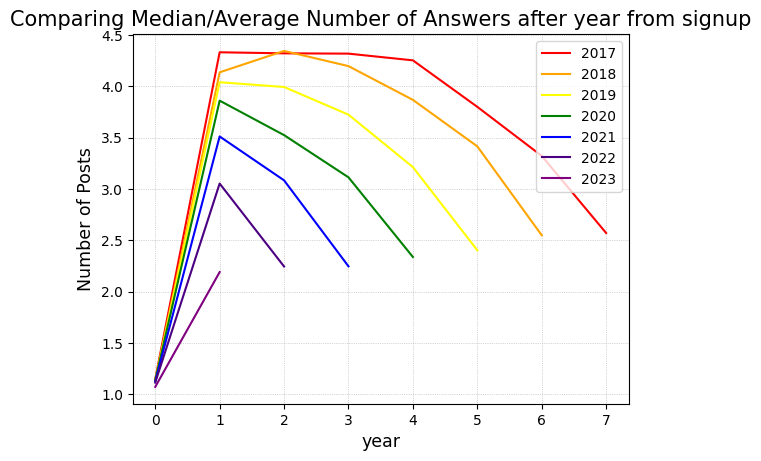

In [35]:
year_list = [str(x) for x in np.arange(2017, 2017+7)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(0, 7):    
        ax.plot(df_diff_usrcre_avg_med.loc[df_diff_usrcre_avg_med['usr_creationyear']==year_list[i], ['avg_cnt']].values, # specify data
                color = color_list[i],
                label = year_list[i]
        ) 

ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [67]:
df_usr_post_cre_avg_med = df_usr_post_cre_avg_med.sort_values(by = ['usr_creationyear', 'post_creationyear'])

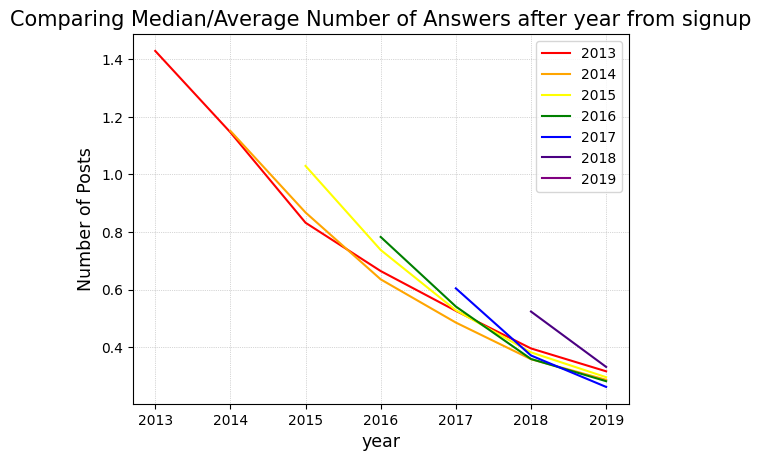

In [113]:
std_year = 2013
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear']==year_list[i]].head(len(year_list[i:])).avg_post_cnt.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

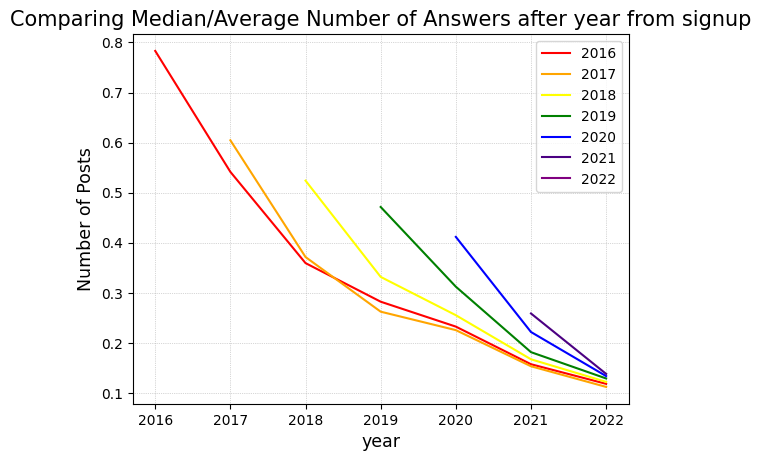

In [114]:
std_year = 2016
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear']==year_list[i]].head(len(year_list[i:])).avg_post_cnt.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [145]:
df_no_post_per_year['post_n_usr_cnt'] = df_no_post_per_year['usr_cnt'] - df_no_post_per_year['post_y_usr_cnt'] 

In [146]:
df_no_post_per_year = df_no_post_per_year.sort_values(by = ['usr_creationyear', 'postcreationyear'])

In [147]:
df_no_post_per_year

,usr_creationyear,postcreationyear,usr_cnt,post_y_usr_cnt,post_n_usr_cnt
11,2008,2013,21626,12584,9042
14,2008,2014,21626,13920,7706
12,2008,2015,21626,14795,6831
70,2008,2016,21626,15631,5995
22,2008,2017,21626,16301,5325
...,...,...,...,...,...
2,2021,2022,2783431,2671138,112293
86,2021,2023,2783431,2719448,63983
88,2022,2022,3052148,2738095,314053
55,2022,2023,3052148,2963613,88535


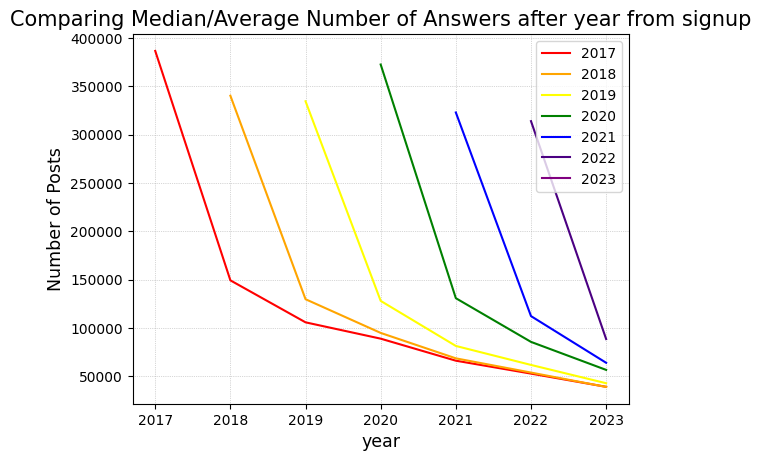

In [148]:
std_year = 2017
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_usr_cnt.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [149]:
df_no_post_per_year['post_n_rate'] = df_no_post_per_year['post_n_usr_cnt']/df_no_post_per_year['usr_cnt']*100

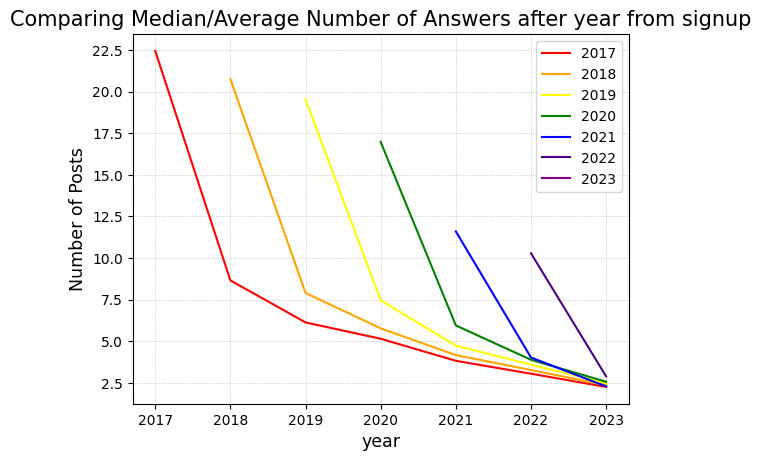

In [150]:
std_year = 2017
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_rate.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

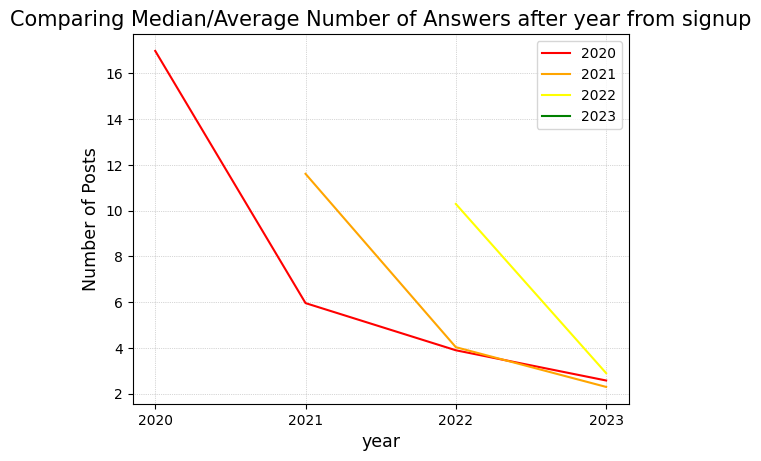

In [151]:
std_year = 2020
num_of_year = 4
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_rate.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [152]:
df_no_post_per_year

,usr_creationyear,postcreationyear,usr_cnt,post_y_usr_cnt,post_n_usr_cnt,post_n_rate
11,2008,2013,21626,12584,9042,41.810783
14,2008,2014,21626,13920,7706,35.633034
12,2008,2015,21626,14795,6831,31.586979
70,2008,2016,21626,15631,5995,27.721261
22,2008,2017,21626,16301,5325,24.623139
...,...,...,...,...,...,...
2,2021,2022,2783431,2671138,112293,4.034337
86,2021,2023,2783431,2719448,63983,2.298710
88,2022,2022,3052148,2738095,314053,10.289573
55,2022,2023,3052148,2963613,88535,2.900744


In [153]:
df_no_post_per_year['post_n_pct_chg'] = df_no_post_per_year.groupby('usr_creationyear').post_n_usr_cnt.pct_change()

In [154]:
df_no_post_per_year= df_no_post_per_year.fillna(0)

In [155]:
df_no_post_per_year

,usr_creationyear,postcreationyear,usr_cnt,post_y_usr_cnt,post_n_usr_cnt,post_n_rate,post_n_pct_chg
11,2008,2013,21626,12584,9042,41.810783,0.000000
14,2008,2014,21626,13920,7706,35.633034,-0.147755
12,2008,2015,21626,14795,6831,31.586979,-0.113548
70,2008,2016,21626,15631,5995,27.721261,-0.122383
22,2008,2017,21626,16301,5325,24.623139,-0.111760
...,...,...,...,...,...,...,...
2,2021,2022,2783431,2671138,112293,4.034337,-0.652376
86,2021,2023,2783431,2719448,63983,2.298710,-0.430214
88,2022,2022,3052148,2738095,314053,10.289573,0.000000
55,2022,2023,3052148,2963613,88535,2.900744,-0.718089


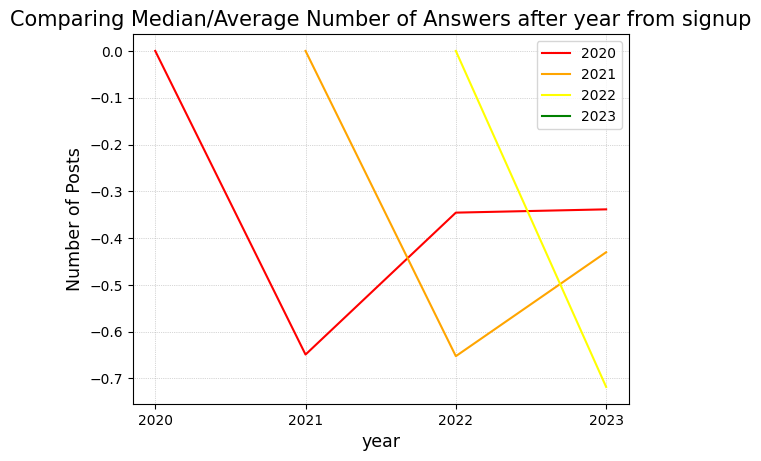

In [156]:
std_year = 2020
num_of_year = 4
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

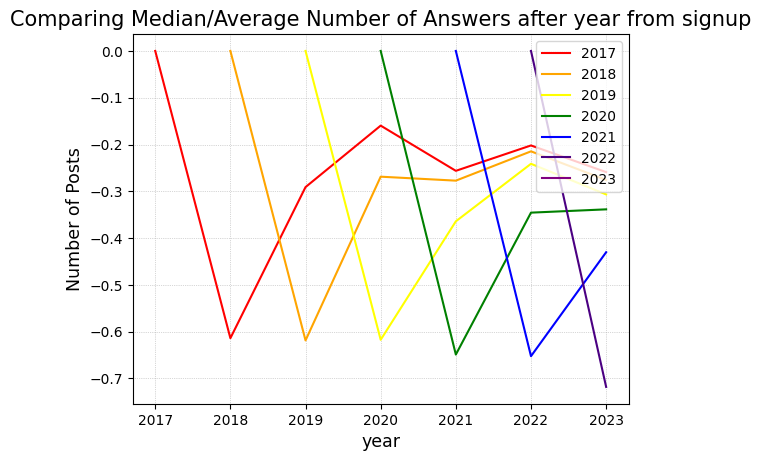

In [157]:
std_year = 2017
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [160]:
df_no_post_per_year[df_no_post_per_year['usr_creationyear'] =='2022']

,usr_creationyear,postcreationyear,usr_cnt,post_y_usr_cnt,post_n_usr_cnt,post_n_rate,post_n_pct_chg
88,2022,2022,3052148,2738095,314053,10.289573,0.000000
55,2022,2023,3052148,2963613,88535,2.900744,-0.718089


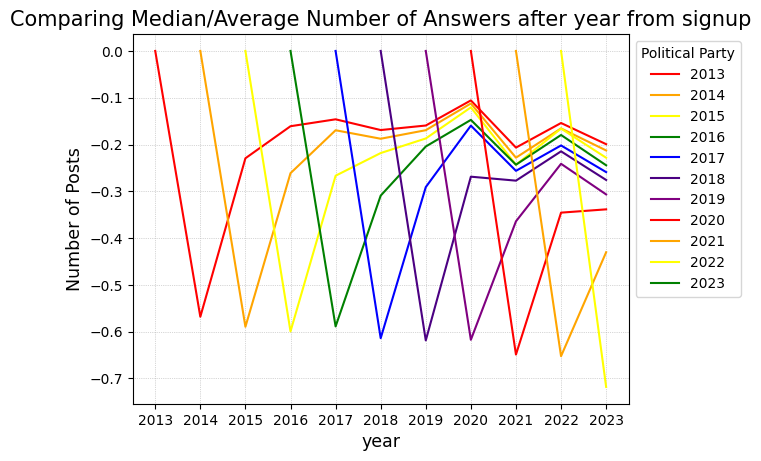

In [167]:
std_year = 2013
num_of_year = 11
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple'
            , 'red', 'orange', 'yellow', 'green']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

# ax.legend(loc = 'upper right', fontsize = 10) # add legend
ax.legend(title = "Political Party",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )


ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Number of Active Users per Year

In [41]:
df_active_usr_per_year_tot = df_active_usr_per_year.groupby(['yeardiff']).sum()['usr_cnt'].reset_index()

In [43]:
df_active_usr_per_year_tot = df_active_usr_per_year_tot.set_index(['yeardiff'])

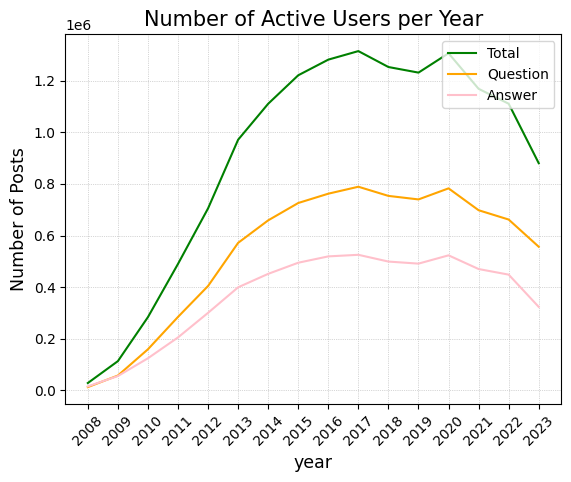

In [44]:
fig, ax = plt.subplots()


ax.plot( df_active_usr_per_year_tot.index, 
        df_active_usr_per_year_tot['usr_cnt'].values, # specify data
        color = 'green',
        label = 'Total'
) 


ax.plot(df_active_usr_per_year_tot.index
        , df_active_usr_per_year.loc[df_active_usr_per_year['posttypeid'] =='1', 'usr_cnt'].values, # specify data
        color = 'orange',
        label = 'Question'
) 

ax.plot(df_active_usr_per_year_tot.index
        , df_active_usr_per_year.loc[df_active_usr_per_year['posttypeid'] =='2', 'usr_cnt'].values, # specify data
        color = 'pink',
        label = 'Answer'
) 

# ax.plot(df_year_gpt_yn.loc[c_gpt_y&u_c_gpt_y, 'q_cnt'].values, # specify data
#         color = 'lightblue',
#         label = 'Median'
# ) 




ax.set_title('Number of Active Users per Year', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

ax.set_xticks([str(x) for x in np.arange(2008, 2024)])
plt.xticks(rotation=45)
plt.show();

In [3]:
df_active_usr_per_day


df_active_usr_per_day_tot = df_active_usr_per_day.groupby(['creationdate']).sum()['usr_cnt'].reset_index()


In [4]:
df_active_usr_per_day_tot

,creationdate,usr_cnt
0,2008-07-31,5
1,2008-08-01,74
2,2008-08-02,59
3,2008-08-03,78
4,2008-08-04,152
...,...,...
5599,2023-11-29,5724
5600,2023-11-30,5670
5601,2023-12-01,5017
5602,2023-12-02,3135


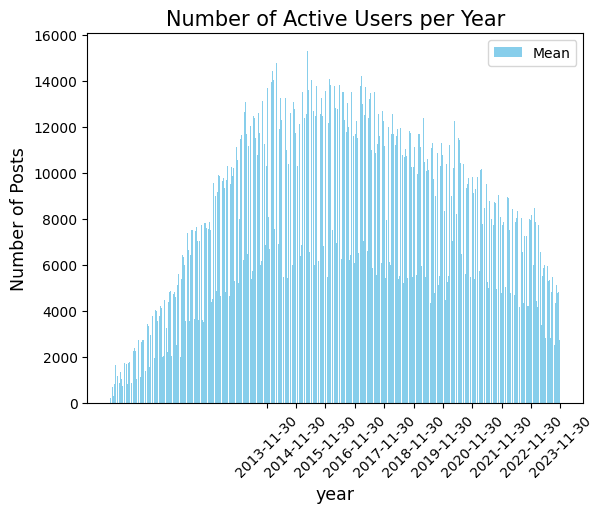

In [9]:
fig, ax = plt.subplots()


# ax.plot( df_active_usr_per_day_tot.creationdate, 
#         df_active_usr_per_day_tot['usr_cnt'].values, # specify data
#         color = 'green',
#         label = 'Total'
# ) 

ax.bar(df_active_usr_per_day_tot.creationdate
    ,  height = df_active_usr_per_day_tot['usr_cnt']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Active Users per Year', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

# ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

# ax.set_xticks([str(x) for x in np.arange(2008, 2024)])
plt.xticks(rotation=45)
plt.show();

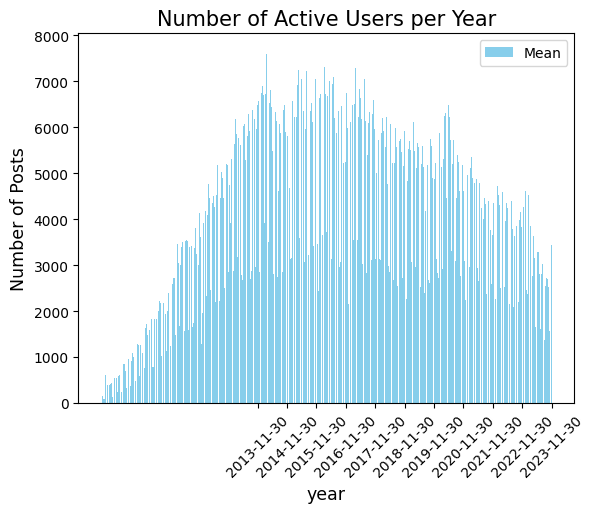

In [14]:
fig, ax = plt.subplots()


ax.bar(df_active_usr_per_day_tot.creationdate
    ,  height = df_active_usr_per_day.loc[df_active_usr_per_day['posttypeid'] =='1', 'usr_cnt']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Active Users per Year', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

# ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

# ax.set_xticks([str(x) for x in np.arange(2008, 2024)])
plt.xticks(rotation=45)
plt.show();

In [12]:
df_active_usr_per_day.loc[df_active_usr_per_day['posttypeid'] =='1', 'usr_cnt']

0           3
2          33
4          21
6          28
8          59
         ... 
11198    3443
11200    3384
11202    2945
11204    1875
11206     615
Name: usr_cnt, Length: 5604, dtype: int64

In [17]:
df_active_usr_per_day_pivot = df_active_usr_per_day.pivot(index='creationdate', columns = 'posttypeid', values = 'usr_cnt').reset_index()

In [22]:
df_active_usr_per_day_pivot['q_over_a'] = df_active_usr_per_day_pivot['2']/df_active_usr_per_day_pivot['1']*100

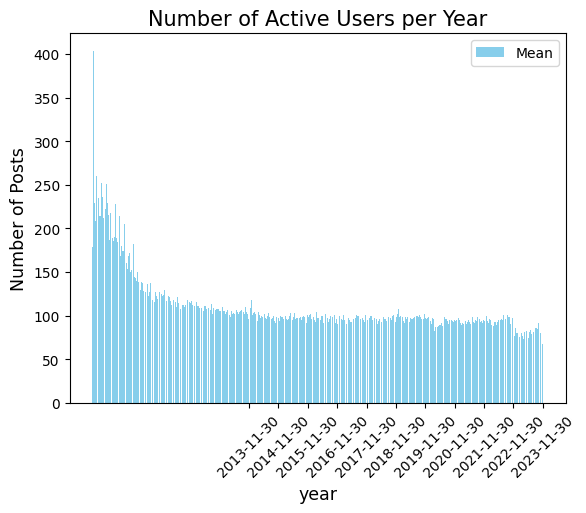

In [25]:
fig, ax = plt.subplots()


ax.bar(df_active_usr_per_day_pivot.creationdate
    ,  height = df_active_usr_per_day_pivot['q_over_a']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Active Users per Year', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

# ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

# ax.set_xticks([str(x) for x in np.arange(2008, 2024)])
plt.xticks(rotation=45)
plt.show();